# Ploting different new features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

import sys
sys.path.append("..") # Adds higher directory to python modules path.
import ta

In [3]:
# Load data
df = pd.read_csv('../data/datas.csv', sep=',')
df = ta.utils.dropna(df)

In [4]:
df.shape

(46306, 8)

In [5]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
0,1315918800,5.80,6.00,5.80,6.00,25.000000,149.190000,5.967600
1,1315922400,5.95,5.95,5.76,5.76,22.353982,132.041023,5.906823
2,1315926000,5.65,5.65,5.65,5.65,2.542000,14.362300,5.650000
6,1315940400,5.92,5.97,5.92,5.97,8.475400,50.504066,5.958901
18,1315983600,5.58,5.62,5.54,5.62,16.425700,91.537032,5.572793


In [6]:
# Add bollinger band high indicator filling NaN values
df['bb_high_indicator'] = ta.volatility.bollinger_hband_indicator(df["Close"], n=20, ndev=2, fillna=True)

In [7]:
df.shape

(46306, 9)

In [8]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,bb_high_indicator
0,1315918800,5.80,6.00,5.80,6.00,25.000000,149.190000,5.967600,0.0
1,1315922400,5.95,5.95,5.76,5.76,22.353982,132.041023,5.906823,0.0
2,1315926000,5.65,5.65,5.65,5.65,2.542000,14.362300,5.650000,0.0
6,1315940400,5.92,5.97,5.92,5.97,8.475400,50.504066,5.958901,0.0
18,1315983600,5.58,5.62,5.54,5.62,16.425700,91.537032,5.572793,0.0


In [9]:
df[df['bb_high_indicator'] == 1].shape

(2638, 9)

In [10]:
df[df['bb_high_indicator'] == 0].shape

(37917, 9)

In [11]:
# Add all ta features filling nans values
df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume_BTC", fillna=True)

../ta/trend.py:468: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
../ta/trend.py:472: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [12]:
df.momentum_kama

0           6.000000
1           5.760000
2           5.650000
6           5.970000
18          5.620000
19          5.560000
20          5.610000
21          5.650000
22          5.520000
26          5.530000
43          5.473081
44          5.418672
45          5.373849
49          5.354899
50          5.332342
66          5.259016
69          5.179806
73          5.131401
75          5.092358
98          5.062638
117         5.047145
120         5.036701
123         5.031556
124         4.991260
126         4.964943
127         4.962529
144         4.959170
161         4.958146
163         5.123541
164         5.234282
            ...     
52027    4051.398466
52028    4051.234980
52029    4051.384446
52030    4051.526368
52031    4050.896428
52032    4050.534911
52033    4048.371454
52034    4047.552106
52035    4047.374742
52036    4047.129433
52037    4045.530769
52038    4042.858856
52039    4040.681877
52040    4036.608119
52041    4036.232676
52042    4034.844837
52043    4034

In [13]:
df.shape

(46306, 69)

# Ploting some volatility features

### Bollinger Bands

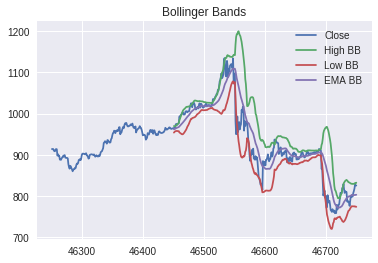

In [14]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40700:41000].volatility_bbh, label='High BB')
plt.plot(df[40700:41000].volatility_bbl, label='Low BB')
plt.plot(df[40700:41000].volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

### Keltner Channel

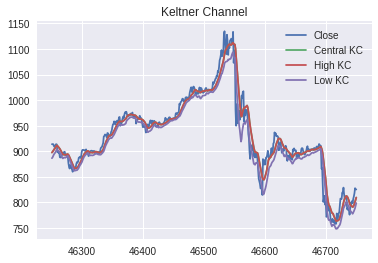

In [15]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_kcc, label='Central KC')
plt.plot(df[40500: 41000].volatility_kch, label='High KC')
plt.plot(df[40500: 41000].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

### Donchian Channel

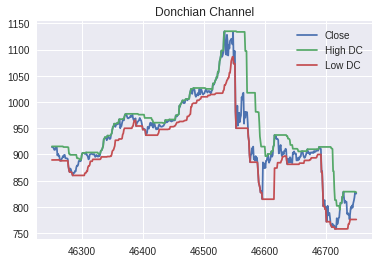

In [16]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_dch, label='High DC')
plt.plot(df[40500: 41000].volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()

# Ploting trend features

### MACD

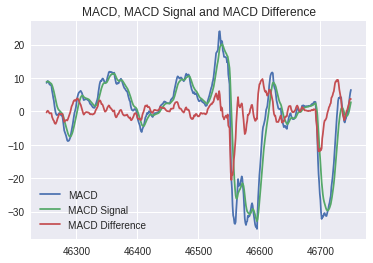

In [17]:
plt.plot(df[40500:41000].trend_macd, label='MACD')
plt.plot(df[40500:41000].trend_macd_signal, label='MACD Signal')
plt.plot(df[40500:41000].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

### KST

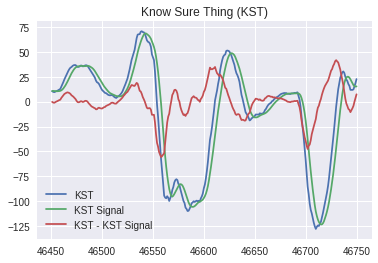

In [18]:
plt.plot(df[40700:41000].trend_kst, label='KST')
plt.plot(df[40700:41000].trend_kst_sig, label='KST Signal')
plt.plot(df[40700:41000].trend_kst_diff, label='KST - KST Signal')
plt.title('Know Sure Thing (KST)')
plt.legend()
plt.show()

### Ichimoku Kinkō Hyō

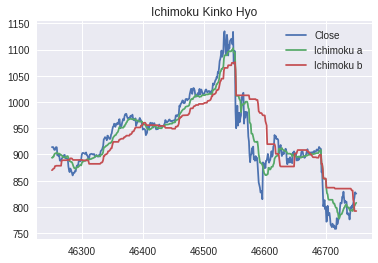

In [19]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40500:41000].trend_ichimoku_a, label='Ichimoku a')
plt.plot(df[40500:41000].trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

# Ploting all features

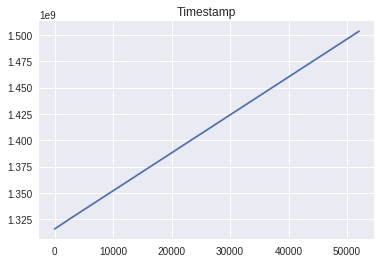

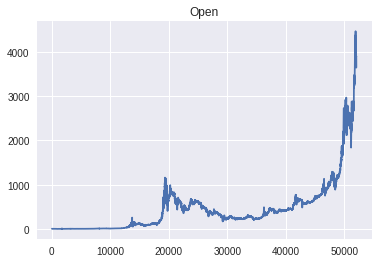

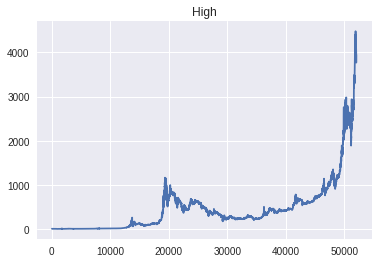

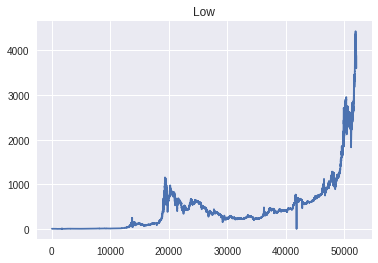

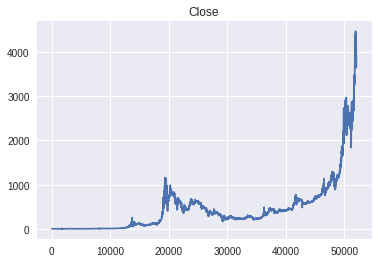

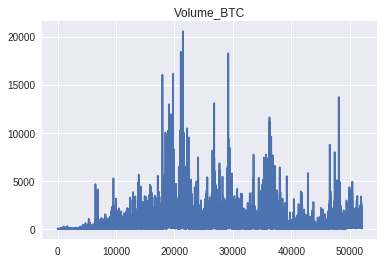

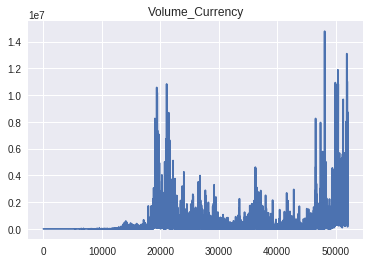

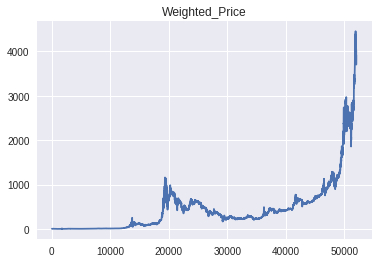

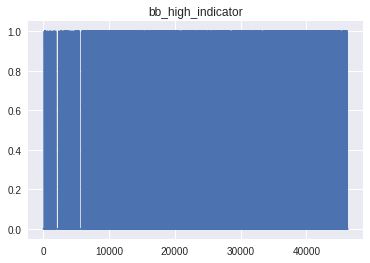

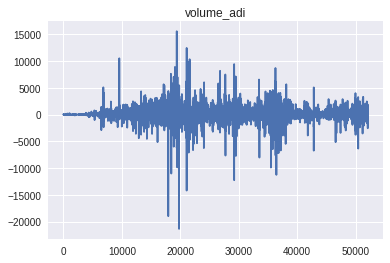

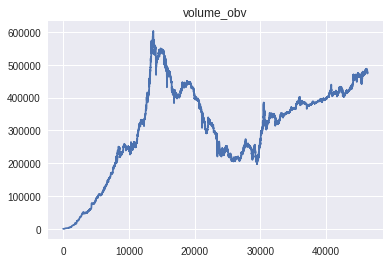

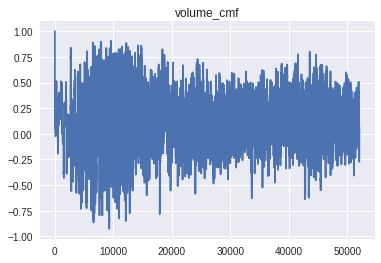

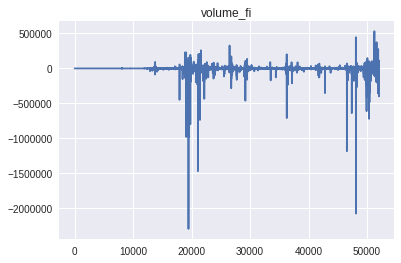

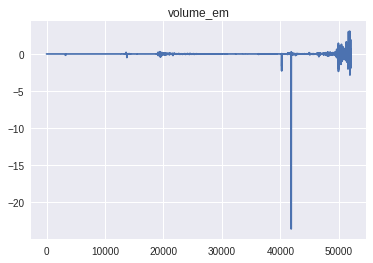

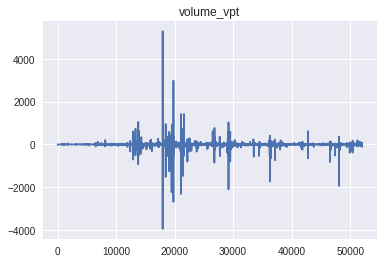

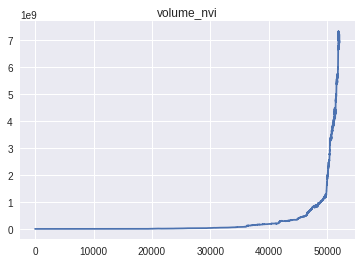

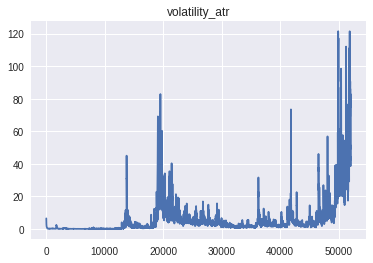

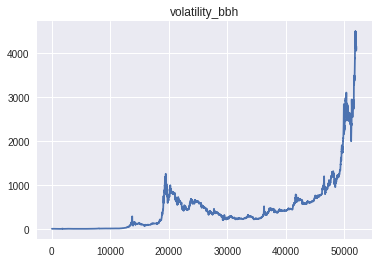

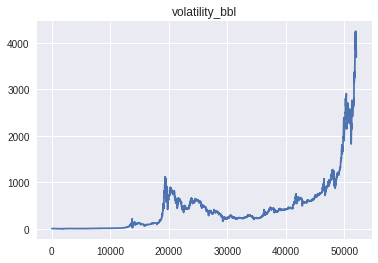

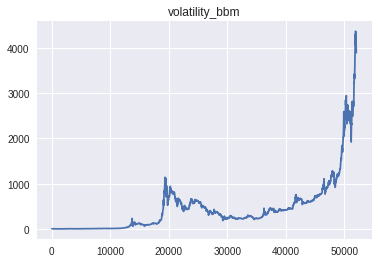

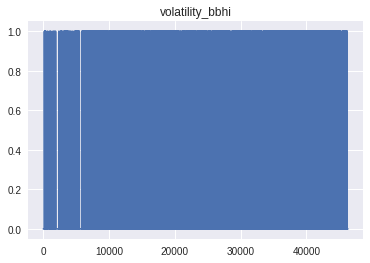

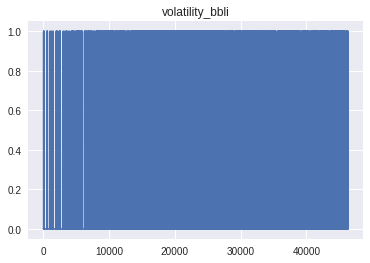

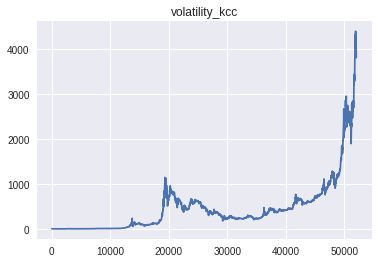

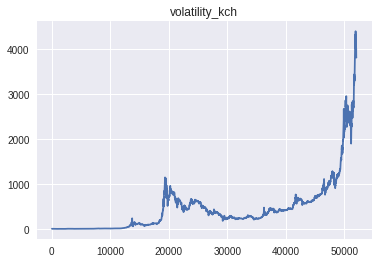

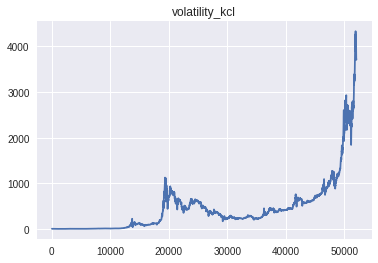

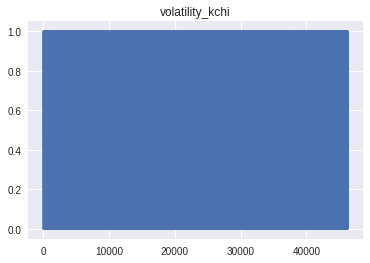

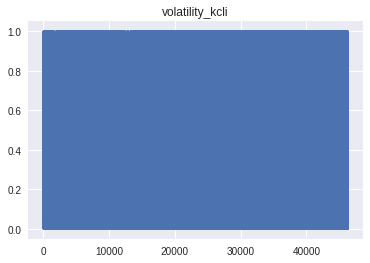

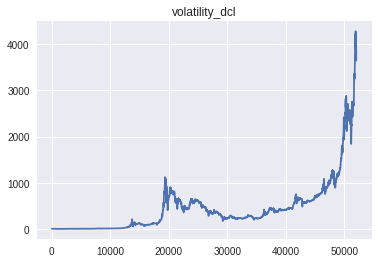

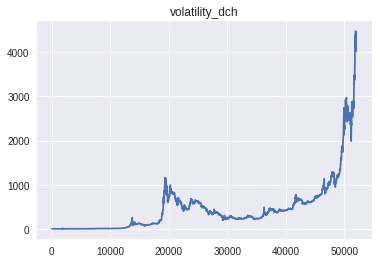

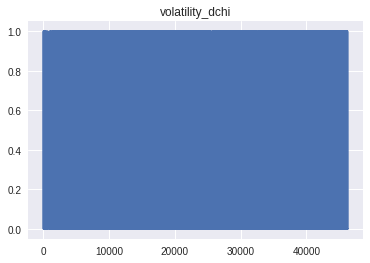

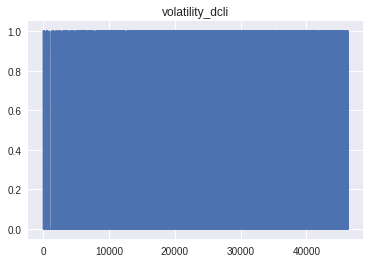

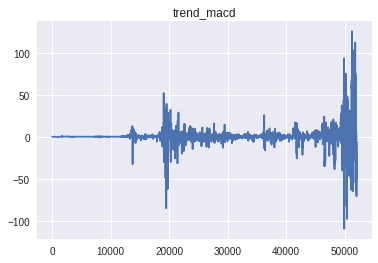

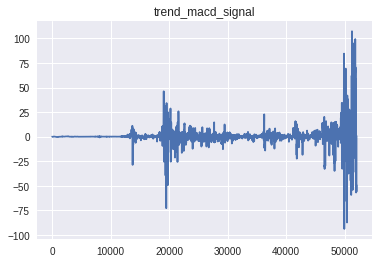

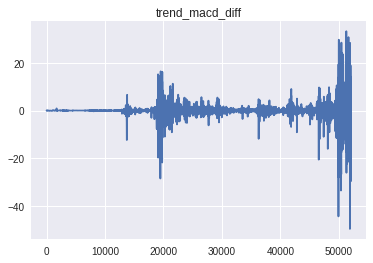

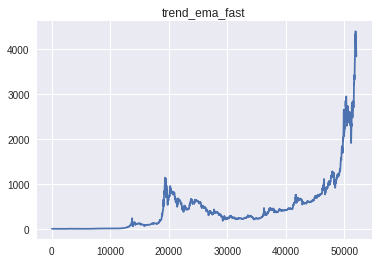

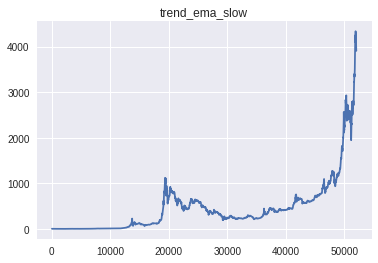

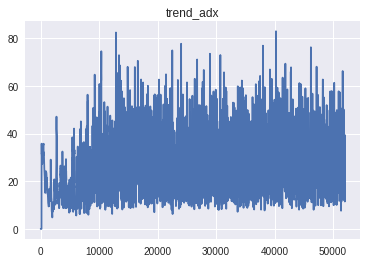

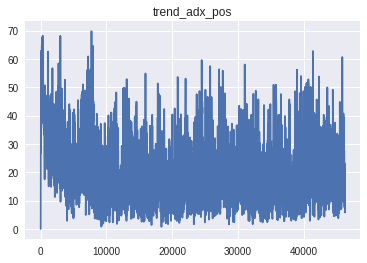

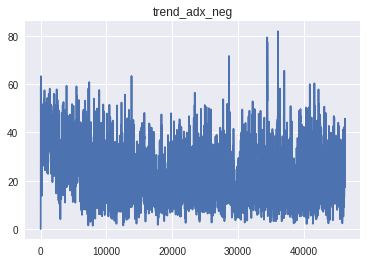

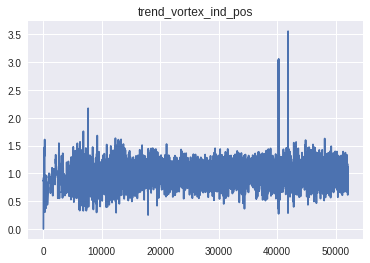

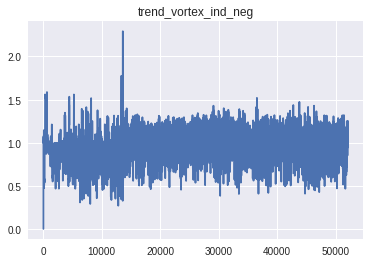

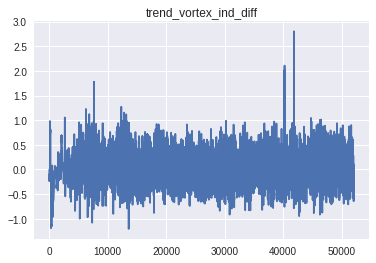

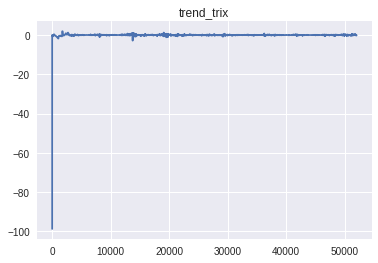

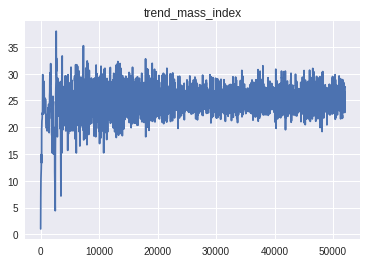

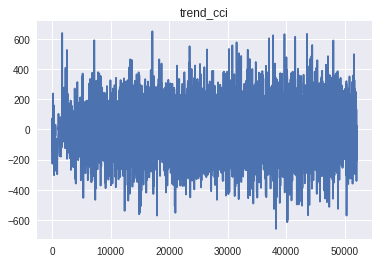

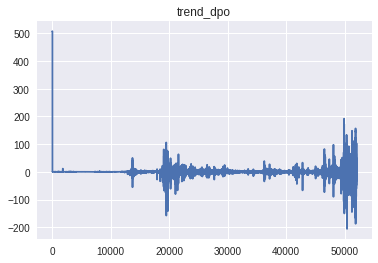

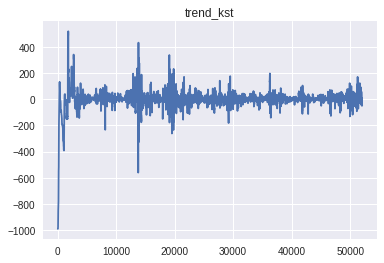

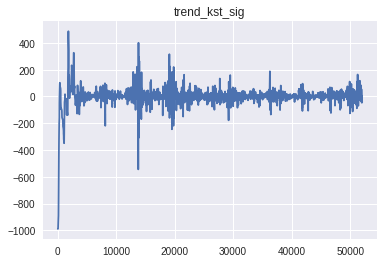

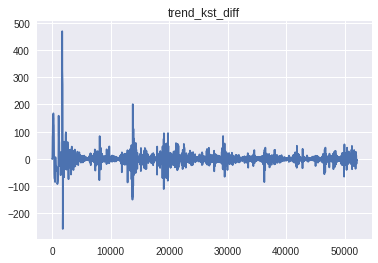

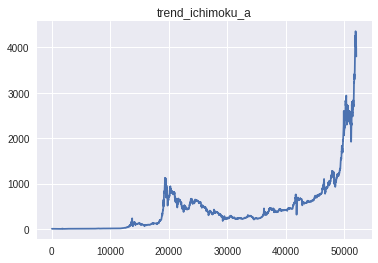

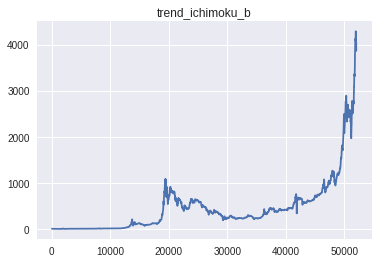

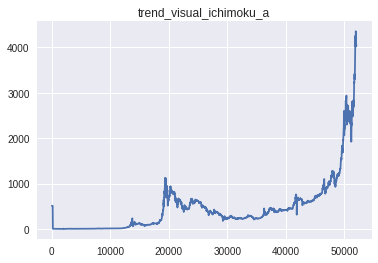

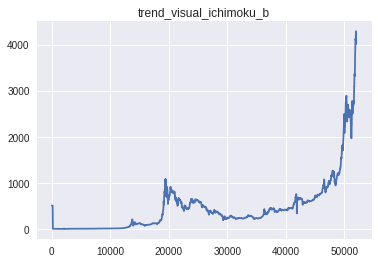

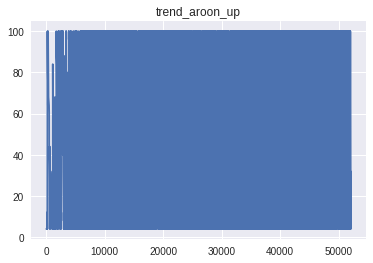

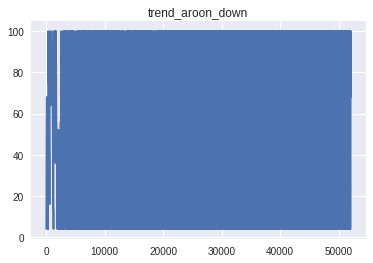

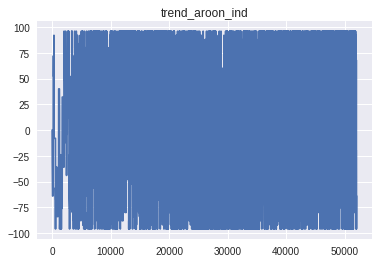

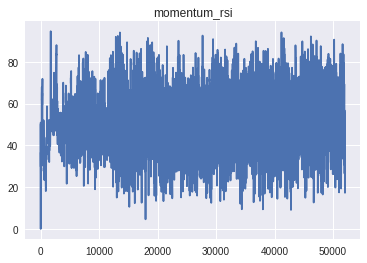

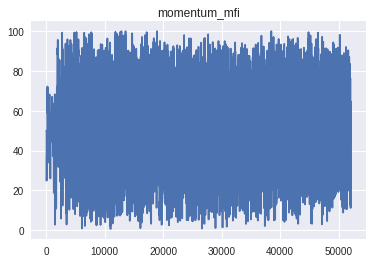

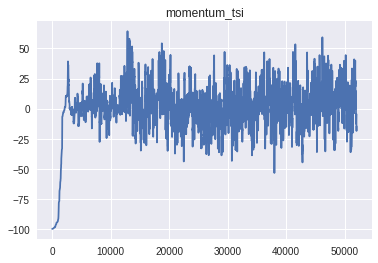

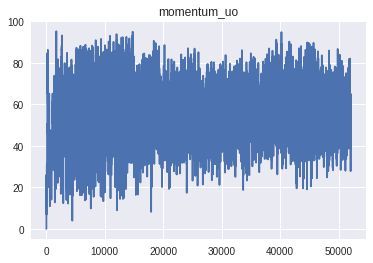

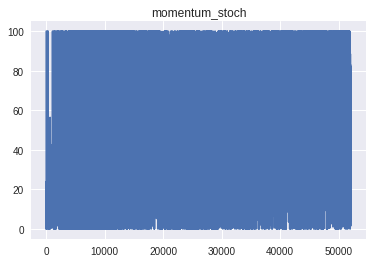

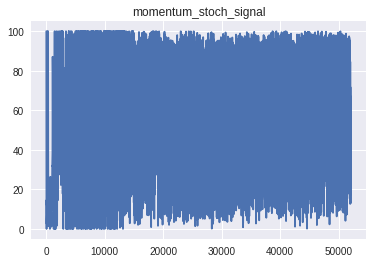

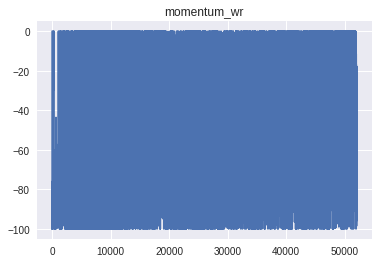

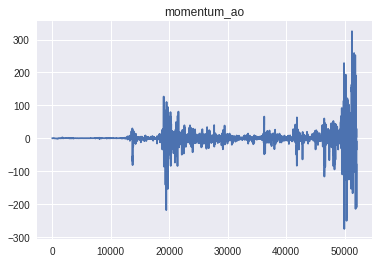

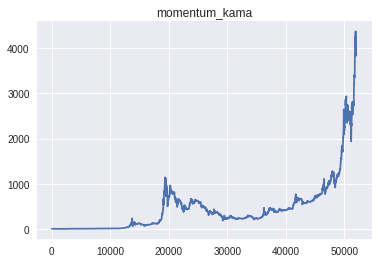

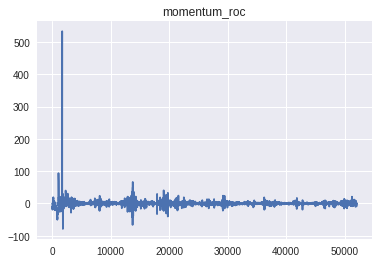

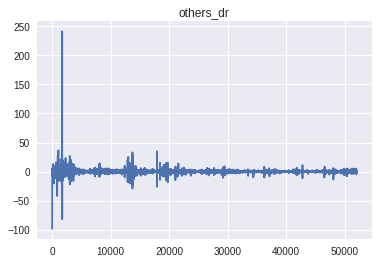

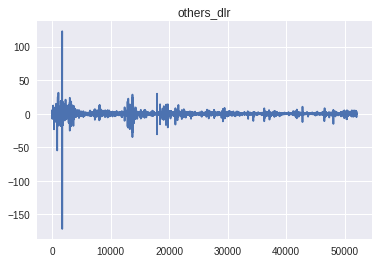

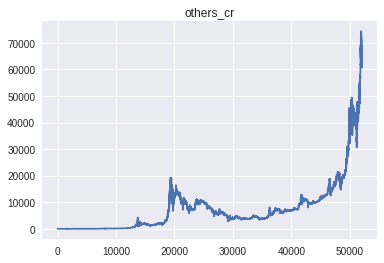

In [20]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()

In [21]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_Currency', 'Weighted_Price', 'bb_high_indicator', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_vpt',
       'volume_nvi', 'volatility_atr', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbm', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch',
       'volatility_dchi', 'volatility_dcli', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_a',
       'trend_ichimoku_b', 'trend_visual_ichimoku_a',
       'trend_visual_ichimok